In [10]:
import pandas  as pd
import numpy as np
data=pd.read_csv(r"C:\Users\sowmy\Desktop\DataScience DataSets\iris dataset\IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
test=data.iloc[:,0:-1]
train=data.iloc[:,-1]
print(test)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [13]:
print(train)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


In [14]:
test.head()
test.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
dtype: int64

In [15]:
train.count()

150

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(test, train, test_size=0.3, random_state=1)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
from sklearn import metrics

In [20]:
score={}
score_list=[]
for k in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score[k]=metrics.accuracy_score(y_test,y_pred)
    score_list.append(metrics.accuracy_score(y_test,y_pred))
print(score_list)

[0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777]


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

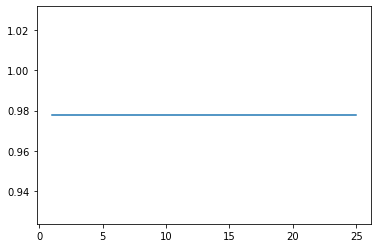

In [22]:
k_range=range(1,26)
plt.plot(k_range,score_list)

In [23]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(test,train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
classes={0:'setosa',1:'versicolor',2:'virginica'}
x_new=[[3,4,5,2],[5,4,2,2]]
y_pred=knn.predict(x_new)
print(y_pred)


['Iris-virginica' 'Iris-setosa']


In [25]:
import pickle
saved_model=pickle.dumps(knn)
knn_from_pickle = pickle.loads(saved_model)
knn_from_pickle.predict(X_test)


array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [26]:
p=[[1.2,0.5,1.4,2.2]]
knn_from_pickle.predict(p)


array(['Iris-setosa'], dtype=object)

In [27]:
with open('model.pickel','wb') as f:
    pickle.dump (knn,f)

In [28]:
with open('model.pickel','rb') as f:
    result=pickle.load(f)

In [29]:
result.predict(p)

array(['Iris-setosa'], dtype=object)